In [1]:
import numpy as np
import sympy as sp
from IPython.display import display, Math

# Variables

In [2]:
x1, x2 = sp.symbols('x_1, x_2')
p1, p2 = sp.symbols('p_1, p_2')
x_1 = 70 - p1
x_2 = 76 - 2*p2
C = (4 * x1 ** 2) + (5 * x1 * x2) + (x2 ** 2)

# Task

In [3]:
print("\nЗадача монополист:")
print("Даны функции спроса на каждый продукт:")
display(Math(r'x_1=70-p_1,\ x_2=76-2p_2'))
print("Функция издержек фирмы-монополиста имеет вид")
display(Math(r'C(x_1,x_2) = 4x_1^{2}+5x_1x_2 + x_2^{2}'))
print("Найти производственный план, максимизируюзий прибыль фирмы.\nНайти эластичность спроса на каждый продукт по цене")


Задача монополист:
Даны функции спроса на каждый продукт:


<IPython.core.display.Math object>

Функция издержек фирмы-монополиста имеет вид


<IPython.core.display.Math object>

Найти производственный план, максимизируюзий прибыль фирмы.
Найти эластичность спроса на каждый продукт по цене


# Solution

In [4]:
def express(a, b, name):
    # выразить одну через другую
    sym = sp.symbols(name)
    sol = sp.solve(a-sym, b)
    assert len(sol) == 1
    return (sym, sol[0])

In [5]:
p_1 = express(x_1, p1, "x_1")[1]
p_2 = express(x_2, p2, "x_2")[1]

In [6]:
R = p1*x1 + p2*x2
R

p_1*x_1 + p_2*x_2

In [7]:
R = R.subs({p1:p_1, p2:p_2})
R

x_1*(70 - x_1) + x_2*(38 - x_2/2)

In [8]:
P_uneval = R - sp.UnevaluatedExpr(C)
P = P_uneval.doit()

In [9]:
res = sp.solve([sp.Eq(0, P.diff(x1)), sp.Eq(0, P.diff(x2))])
p_1_val = res[x1]
p_2_val = res[x2]
print(f'p_1 = {p_1_val}\np_2 = {p_2_val}')


p_1 = 4
p_2 = 6


In [10]:
x_1_val = x_1.subs({p1: p_1_val})
x_2_val = x_2.subs({p2: p_2_val})
print(f'x_1 = {x_1_val}, x_2 = {x_2_val}')

x_1 = 66, x_2 = 64


In [11]:
E_d1 = (x_1.diff() * p1/x_1).simplify()
E_d2 = (x_2.diff() * p2/x_2).simplify()


In [12]:
E_d1

p_1/(p_1 - 70)

In [13]:
E_d1_value = E_d1.subs(p1, p_1_val)
E_d1_value

-2/33

In [14]:
E_d2_value = E_d2.subs(p2, p_2_val)
E_d2_value

-3/16

In [15]:
coef1 = P.diff(x1).diff(x1) # глав диагональ
coef2 = P.diff(x2).diff(x2) # глав диагональ
coef3 = P.diff(x1).diff(x2) # смешанные =>побочная диагональ
coef4 = P.diff(x2).diff(x1) # смешанные =>побочная диагональ


In [16]:
delta1 = coef1 # 1-ый минор
delta2 = coef1*coef2 - coef3*coef4 # 2-ой минор
delta1, delta2

(-10, 5)

In [17]:
income = R.subs({x1: p_1_val, x2: p_2_val})
income

474

In [18]:
m = np.array([
    [coef1, coef3],
    [coef4, coef2],
], dtype=float)
m

array([[-10.,  -5.],
       [ -5.,  -3.]])

In [19]:
C_symb = sp.symbols("C")
R_symb = sp.symbols("R")
P_symb = sp.symbols("P")
E_d1_symb = sp.symbols("E_d_1")
E_d2_symb = sp.symbols("E_d_2")

## Отчет

In [20]:
display(sp.Eq(p_1, p1))
display(sp.Eq(p_2, p2))
display(sp.Eq(C_symb, C))
display(sp.Eq(R_symb, R))
# display(sp.Eq(R_symb-sp.UnevaluatedExpr(C_symb), P_uneval))
display(Math(rf"П(x_1,\ x_2)= {sp.latex(P)}"))
display(Math(f"П(x_1)'= {sp.latex(sp.Eq(P.diff(x1), 0))}"))
display(Math(f"П(x_2)'= {sp.latex(sp.Eq(P.diff(x2), 0))}"))
display(Math(f"x_1 = {p_1_val}"))
display(Math(f"x_2 = {p_2_val}"))
display(R)
display(Math(f"Доход:\ {income}"))
display(sp.Eq(E_d1_symb, E_d1))
display(Math(rf"E_{{d_1}}(p_1={p_1_val}) = {sp.latex(E_d1_value)}")) # оно того стоило
display(sp.Eq(E_d2_symb, E_d2))
display(Math(rf"E_{{d_2}}(p_2={p_2_val}) = {sp.latex(E_d2_value)}"))
display(Math(rf"G = {sp.latex(sp.Matrix(m))}"))
display(Math(r"Чтобы\ убедиться\ в\ том,\ что\ мы\ нашли\ точку\ максимума\ Δ_1 < 0;\ Δ_2 > 0"))
display(Math(rf"Δ_1 = {delta1};\ Δ_2 = {delta2}"))

Eq(70 - x_1, p_1)

Eq(38 - x_2/2, p_2)

Eq(C, 4*x_1**2 + 5*x_1*x_2 + x_2**2)

Eq(R, x_1*(70 - x_1) + x_2*(38 - x_2/2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

x_1*(70 - x_1) + x_2*(38 - x_2/2)

<IPython.core.display.Math object>

Eq(E_d_1, p_1/(p_1 - 70))

<IPython.core.display.Math object>

Eq(E_d_2, p_2/(p_2 - 38))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
# sp.preview([sp.Eq(p_1, p1),sp.Eq(p_2, p2), sp.Eq(C_symb, C), sp.Eq(R_symb, R)], viewer="file", filename="out1.png")

In [22]:
sp.preview(sp.Eq(p_1, p1), viewer="file", filename="t4_img/out1.png")
sp.preview(sp.Eq(p_2, p2), viewer="file", filename="t4_img/out2.png")
sp.preview(sp.Eq(C_symb, C), viewer="file", filename="t4_img/out3.png")
sp.preview(sp.Eq(R_symb, R), viewer="file", filename="t4_img/out4.png")
sp.preview(rf'$$P(x_1,x_2) = {sp.latex(P)}$$', viewer="file", filename="t4_img/out5.png")
sp.preview(rf"$$P(x_1)'= {sp.latex(sp.Eq(P.diff(x1), 0))}$$", viewer="file", filename="t4_img/out6.png")
sp.preview(rf"$$P(x_2)'= {sp.latex(sp.Eq(P.diff(x2), 0))}$$", viewer="file", filename="t4_img/out7.png")
sp.preview([sp.Eq(x1, p_1_val), sp.Eq(x2, p_2_val)], viewer="file", filename="t4_img/out8.png")
sp.preview(fr'$$Income = {income}$$', viewer="file", filename="t4_img/out9.png")
sp.preview(sp.Eq(E_d1_symb, E_d1), viewer="file", filename="t4_img/out10.png")
sp.preview(rf"$$E_{{d_1}}(p_1={p_1_val}) = {sp.latex(E_d1_value)}$$", viewer="file", filename="t4_img/out11.png")
sp.preview(sp.Eq(E_d2_symb, E_d2), viewer="file", filename="t4_img/out12.png")
sp.preview(rf"$$E_{{d_2}}(p_2={p_2_val}) = {sp.latex(E_d2_value)}$$", viewer="file", filename="t4_img/out13.png")
sp.preview(rf"$$G = {sp.latex(sp.Matrix(m))}$$", viewer="file", filename="t4_img/out14.png")
sp.preview(rf"$$Chtobi\ ubeditsya\ v\ tom\ chto\ mi\ nashli\ tochku\ max\ \triangle_1<0;\ \triangle_2>0 $$", viewer="file", filename="t4_img/out15.png")
sp.preview(rf"$$\triangle_1 = {delta1};\ \triangle_2 = {delta2}$$", viewer="file", filename="t4_img/out16.png")

In [23]:
import numpy as np
from PIL import Image

list_im = []
for i in range(1,16+1):
    list_im.append(f"t4_img/out{i}.png")

images = [Image.open(x) for x in list_im]
widths, heights = zip(*(i.size for i in images))

total_heights = 550
max_widths = max(widths)-70

new_im = Image.new('RGB', (total_heights, max_widths))

x_offset = 0
y_offset = 20
for im in images:
    new_im.paste(im, (0,y_offset))
#   x_offset += im.size[0]
    y_offset += im.size[1]
    # y_offset += 50
new_im.save('t4_img/result.png')


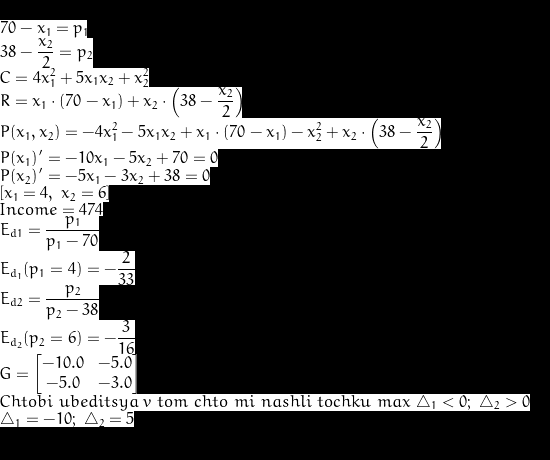

In [24]:
new_im